In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import os

# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/accounts_nearbyschool.parquet'

# 데이터 불러오기
nearbyschool_df = pd.read_parquet(gcs_path, engine='pyarrow')
nearbyschool_df

,id,distance,nearby_school_id,school_id
0,119021,0.004564,6,7
1,119022,0.010787,13,7
2,119023,0.012928,20,7
3,119024,0.013590,4,7
4,119025,0.014122,24,7
...,...,...,...,...
59495,178516,0.018277,1498,5961
59496,178517,0.018652,1474,5961
59497,178518,0.021143,1466,5961
59498,178519,0.024572,1467,5961


In [3]:
nearbyschool_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                59500 non-null  int64  
 1   distance          59500 non-null  float64
 2   nearby_school_id  59500 non-null  int64  
 3   school_id         59500 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 MB


In [4]:
nearbyschool_df.isnull().sum()

id                  0
distance            0
nearby_school_id    0
school_id           0
dtype: int64

In [5]:
nearbyschool_df.describe(include='all')

,id,distance,nearby_school_id,school_id
count,59500.000000,59500.000000,59500.000000,59500.000000
mean,148770.500000,0.055338,2976.695882,2980.524538
std,17176.314845,0.604024,1706.965231,1718.663078
min,119021.000000,0.000000,4.000000,4.000000
25%,133895.750000,0.011484,1518.000000,1493.000000
50%,148770.500000,0.021658,2973.000000,2980.500000
75%,163645.250000,0.064555,4448.000000,4469.000000
max,178520.000000,49.296594,5964.000000,5964.000000


In [7]:
#  0거리 관계 필터링 (자기 자신 포함 여부 확인)
nearbyschool_df[nearbyschool_df['distance'] == 0]

,id,distance,nearby_school_id,school_id
9,119030,0.0,7,7
19,119040,0.0,8,8
29,119050,0.0,22,22
39,119060,0.0,13,13
49,119070,0.0,20,20
...,...,...,...,...
59459,178480,0.0,5959,5959
59469,178490,0.0,5960,5960
59479,178500,0.0,5964,5964
59489,178510,0.0,5963,5963


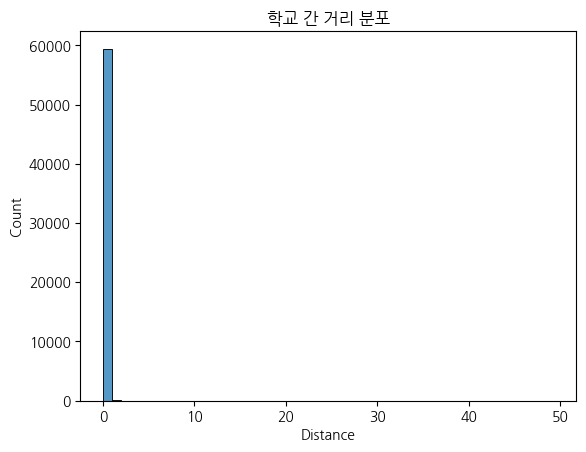

In [9]:
sns.histplot(nearbyschool_df['distance'], bins=50)
plt.title('학교 간 거리 분포')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

In [10]:
nearbyschool_df['school_id'].nunique(), nearbyschool_df['nearby_school_id'].nunique()
# 또는 groupby로 nearby 개수 세기
nearbyschool_df.groupby('school_id').size().describe()

count    5950.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
dtype: float64

In [11]:
nearbyschool_df['school_id'].value_counts().head(10)


school_id
7       10
3967    10
3977    10
3980    10
3975    10
3976    10
3974    10
3972    10
3970    10
3973    10
Name: count, dtype: int64

- 모든 학교가 정확히 10개의 가까운 학교를 갖도록 설계된 데이터

In [14]:
(nearbyschool_df['school_id'] == nearbyschool_df['nearby_school_id']).sum()

5950

In [15]:
# 자기 자신 제거한 후
df_filtered = nearbyschool_df[nearbyschool_df['school_id'] != nearbyschool_df['nearby_school_id']]
df_filtered.groupby('school_id').size().describe()


count    5950.0
mean        9.0
std         0.0
min         9.0
25%         9.0
50%         9.0
75%         9.0
max         9.0
dtype: float64

In [4]:
group_df = pd.read_parquet('gs://final_project_enuyu/data/final_project/votes/accounts_group.parquet')